In [3]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint  

# **CONFIG BLOCK (100 Epochs without Early Stopping)**

In [4]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100                    
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15


# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**


In [5]:
# DATA PREPROCESSING
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST)
)

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD VGG16 FROM SCRATCH
model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN (without early stopping)
checkpoint = ModelCheckpoint(
    'best_vgg16_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint]  
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763103905.864182      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1763103912.564508     129 service.cc:148] XLA service 0x7e82e8004630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763103912.565449     129 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763103913.328507     129 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763103933.807946     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3606 - loss: 1.0843

77/77 ━━━━━━━━━━━━━━━━━━━━ 67s 535ms/step - accuracy: 0.3615 - loss: 1.0833 - val_accuracy: 0.6657 - val_loss: 0.7476
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7316 - loss: 0.6249

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.7320 - loss: 0.6243 - val_accuracy: 0.8061 - val_loss: 0.5007
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7838 - loss: 0.5058

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.7839 - loss: 0.5057 - val_accuracy: 0.8372 - val_loss: 0.4046
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8035 - loss: 0.4455 - val_accuracy: 0.7888 - val_loss: 0.4590
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8486 - loss: 0.3900

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 352ms/step - accuracy: 0.8487 - loss: 0.3898 - val_accuracy: 0.8763 - val_loss: 0.3076
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.8848 - loss: 0.3125 - val_accuracy: 0.8389 - val_loss: 0.3666
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8813 - loss: 0.3148

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.8812 - loss: 0.3147 - val_accuracy: 0.9068 - val_loss: 0.2533
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8895 - loss: 0.2702

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.8893 - loss: 0.2706 - val_accuracy: 0.9097 - val_loss: 0.2325
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8967 - loss: 0.2647

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 352ms/step - accuracy: 0.8966 - loss: 0.2647 - val_accuracy: 0.9310 - val_loss: 0.1869
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9083 - loss: 0.2223 - val_accuracy: 0.9217 - val_loss: 0.1877
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9188 - loss: 0.2009 - val_accuracy: 0.9223 - val_loss: 0.1983
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9156 - loss: 0.2062

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.9157 - loss: 0.2060 - val_accuracy: 0.9620 - val_loss: 0.1062
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9431 - loss: 0.1438 - val_accuracy: 0.9522 - val_loss: 0.1319
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9420 - loss: 0.1481 - val_accuracy: 0.9545 - val_loss: 0.1074
Epoch 15/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9594 - loss: 0.1172

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.9593 - loss: 0.1174 - val_accuracy: 0.9707 - val_loss: 0.0776
Epoch 16/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9520 - loss: 0.1336

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.9520 - loss: 0.1336 - val_accuracy: 0.9741 - val_loss: 0.0772
Epoch 17/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9561 - loss: 0.1002

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.9561 - loss: 0.1003 - val_accuracy: 0.9764 - val_loss: 0.0730
Epoch 18/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9707 - loss: 0.0814

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.9707 - loss: 0.0814 - val_accuracy: 0.9833 - val_loss: 0.0528
Epoch 19/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9805 - loss: 0.0612 - val_accuracy: 0.9799 - val_loss: 0.0591
Epoch 20/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9722 - loss: 0.0792 - val_accuracy: 0.9758 - val_loss: 0.0534
Epoch 21/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9762 - loss: 0.0604 - val_accuracy: 0.9735 - val_loss: 0.0614
Epoch 22/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9746 - loss: 0.0646

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.9746 - loss: 0.0646 - val_accuracy: 0.9873 - val_loss: 0.0374
Epoch 23/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9876 - loss: 0.0368

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.9876 - loss: 0.0369 - val_accuracy: 0.9977 - val_loss: 0.0095
Epoch 24/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9882 - loss: 0.0393 - val_accuracy: 0.9948 - val_loss: 0.0144
Epoch 25/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9948 - val_loss: 0.0121
Epoch 26/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.9835 - loss: 0.0435 - val_accuracy: 0.9931 - val_loss: 0.0182
Epoch 27/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9711 - loss: 0.0833 - val_accuracy: 0.9684 - val_loss: 0.1006
Epoch 28/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 287ms/step - accuracy: 0.9737 - loss: 0.0628 - val_accuracy: 0.9919 - val_loss: 0.0215
Epoch 29/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9948 - val_loss: 0.0116
Epoch 30/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9905 - loss: 0.0250 - val_a

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 352ms/step - accuracy: 0.9853 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 32/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 4.7691e-04
Epoch 33/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9919 - val_loss: 0.0241
Epoch 34/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9976 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 5.5339e-04
Epoch 35/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - accuracy: 0.9981 - loss: 0.0051 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 36/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9934 - loss: 0.0165 - val_accuracy: 0.9988 - val_loss: 0.0058
Epoch 37/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9892 - loss: 0.0271 - val_accuracy: 0.9845 - val_loss: 0.0437
Epoch 38/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9826 - loss: 0.0425


# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.9097 - loss: 0.9970

 Test Accuracy: 93.67%
 Test Loss: 0.7116
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9118    0.9199    0.9159       562
         Normal     0.9242    0.9168    0.9205       625
Viral Pneumonia     0.9764    0.9764    0.9764       550

       accuracy                         0.9367      1737
      macro avg     0.9375    0.9377    0.9376      1737
   weighted avg     0.9367    0.9367    0.9367      1737



<Figure size 800x600 with 0 Axes>

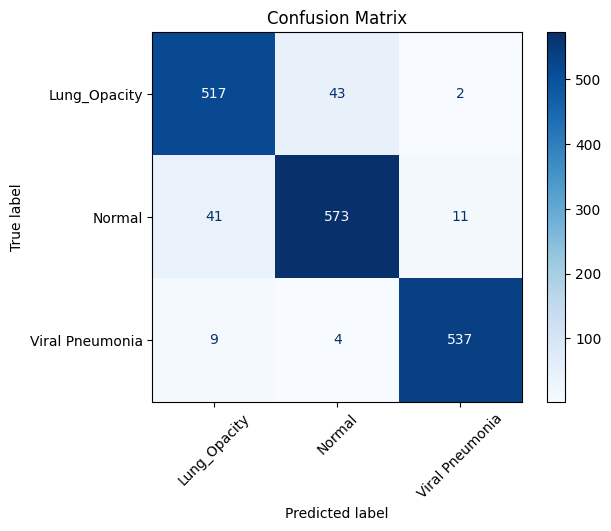

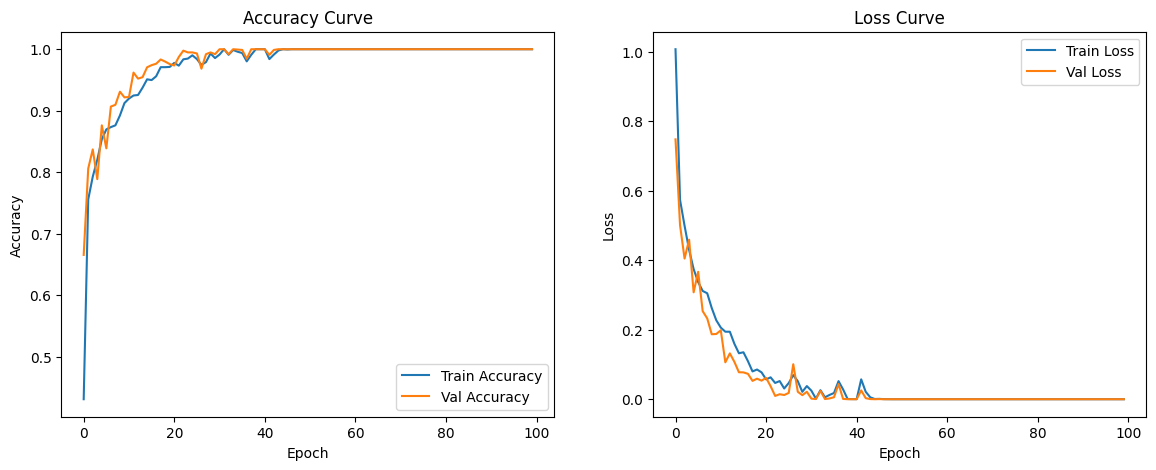

In [6]:
# EVALUATE
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# PLOTS
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
# IMPORTS
from tensorflow.keras.callbacks import EarlyStopping

# **CONFIG BLOCK (100 Epochs with Early Stopping)**


In [10]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15


# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**


In [11]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.3345 - loss: 1.0995

77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 429ms/step - accuracy: 0.3346 - loss: 1.0995 - val_accuracy: 0.3596 - val_loss: 1.0974
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.4632 - loss: 0.9969

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.4650 - loss: 0.9947 - val_accuracy: 0.7739 - val_loss: 0.5489
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7865 - loss: 0.5483

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 361ms/step - accuracy: 0.7864 - loss: 0.5483 - val_accuracy: 0.8228 - val_loss: 0.4731
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.8194 - loss: 0.4320 - val_accuracy: 0.8211 - val_loss: 0.4403
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8359 - loss: 0.4017

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.8360 - loss: 0.4015 - val_accuracy: 0.8636 - val_loss: 0.3423
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8667 - loss: 0.3517

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.8665 - loss: 0.3518 - val_accuracy: 0.8797 - val_loss: 0.3082
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8682 - loss: 0.3191

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.8683 - loss: 0.3191 - val_accuracy: 0.8809 - val_loss: 0.2892
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8749 - loss: 0.3077

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.8749 - loss: 0.3076 - val_accuracy: 0.8936 - val_loss: 0.2550
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8860 - loss: 0.3001

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 358ms/step - accuracy: 0.8861 - loss: 0.2998 - val_accuracy: 0.9114 - val_loss: 0.2233
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9119 - loss: 0.2328

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.9118 - loss: 0.2330 - val_accuracy: 0.9275 - val_loss: 0.1858
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9152 - loss: 0.2125

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.9151 - loss: 0.2126 - val_accuracy: 0.9350 - val_loss: 0.1619
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9368 - loss: 0.1724

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 348ms/step - accuracy: 0.9367 - loss: 0.1727 - val_accuracy: 0.9419 - val_loss: 0.1780
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9443 - loss: 0.1589

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.9441 - loss: 0.1591 - val_accuracy: 0.9499 - val_loss: 0.1371
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9310 - loss: 0.1591

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.9310 - loss: 0.1593 - val_accuracy: 0.9511 - val_loss: 0.1282
Epoch 15/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9336 - loss: 0.1610

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 358ms/step - accuracy: 0.9336 - loss: 0.1611 - val_accuracy: 0.9540 - val_loss: 0.1250
Epoch 16/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9373 - loss: 0.1670

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.9373 - loss: 0.1670 - val_accuracy: 0.9643 - val_loss: 0.1128
Epoch 17/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9599 - loss: 0.1060 - val_accuracy: 0.9540 - val_loss: 0.1243
Epoch 18/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9583 - loss: 0.1174

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 361ms/step - accuracy: 0.9583 - loss: 0.1172 - val_accuracy: 0.9712 - val_loss: 0.0729
Epoch 19/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9697 - loss: 0.0974

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.9697 - loss: 0.0974 - val_accuracy: 0.9850 - val_loss: 0.0376
Epoch 20/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9775 - loss: 0.0619

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.9775 - loss: 0.0620 - val_accuracy: 0.9873 - val_loss: 0.0448
Epoch 21/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9749 - loss: 0.0567 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 22/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9699 - loss: 0.0784 - val_accuracy: 0.9200 - val_loss: 0.2057



# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8887 - loss: 0.4877

 Test Accuracy: 92.57%
 Test Loss: 0.3278
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8907    0.8986    0.8946       562
         Normal     0.9134    0.8944    0.9038       625
Viral Pneumonia     0.9749    0.9891    0.9819       550

       accuracy                         0.9257      1737
      macro avg     0.9263    0.9274    0.9268      1737
   weighted avg     0.9255    0.9257    0.9256      1737



<Figure size 800x600 with 0 Axes>

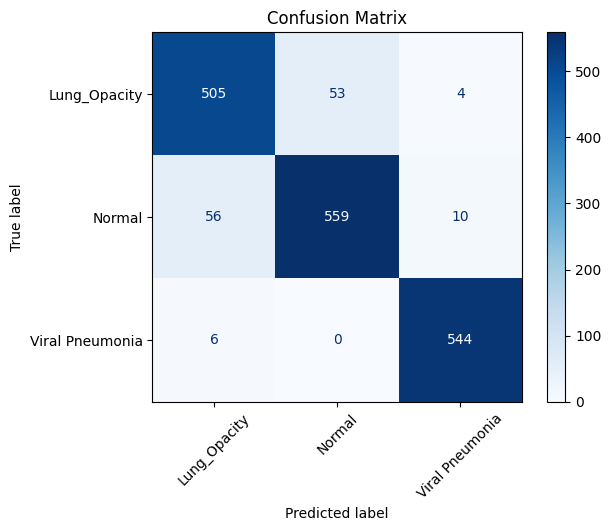

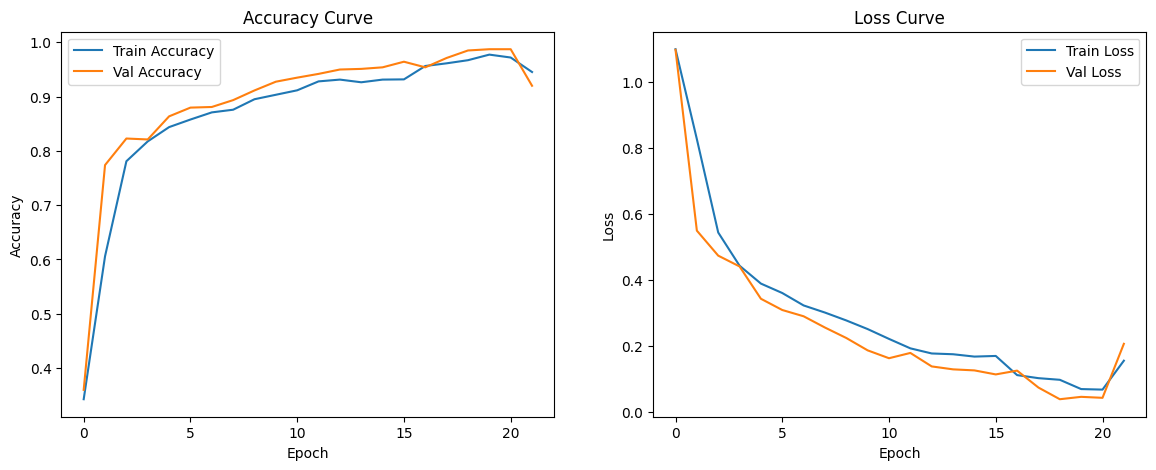

In [12]:
#  EVALUATE 

test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()


#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
